# Исследование объявлений о продаже квартир

**Описание задания на исследование:**

В вашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования - установление параметров реальности продажи квартиры:**

1. Рассмотрение закономерностей по времени продажи квартир
2. Рассмотрение редких и выбивающихся значений
3. Выявление факторов, в большей степени влияющих на стоимость квартир
4. Анализ предложений квартир в центре Санкт-Петербурга

**Ход исследования**

Данные представлены заказчиком, частично заполнены вручную, частично собраны автоматически. О качестве данных ничего не известно, кроме описания столбцов. Таким образом, исследование необходимо выполнять в четыре этапа:
1. Обзор и общее изучение данных.
2. Предобработка данных.
3. Выполнение дополнительных расчётов необходимых для достижения цели исследования.
4. Исследовательский анализ данных и составление выводов.

## Изучение данных из файла

Проведем необходимые изучение данных, подключим необходимые для исследования библиотеки

In [92]:
# импортируем необходимые нам библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

#Подключим файл с данными указав как разделитель знак табуляции

polluted_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

#Просмотрим общую информацию о данных
polluted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Первый взгляд показывает наличие достаточного количества данных для анализа. При этом очевидно, что многие столбцы не содержат всей необходимой информации, есть пропуски, особенно в понимании, является квартира апартаментами или нет.
Проверим случайные строчки базы данных:

In [87]:
# Применим случайную выборку данных для первичного ознакомления
# Укажем параметр random_state=1, для сохранения результата при повторных запусках алгоритма, если нам
# вдруг понадобится

polluted_data.sample(10, random_state=1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17338,5,3300000.0,47.0,2018-03-30T00:00:00,1,3.00,10.0,NaN,4,NaN,...,NaN,NaN,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,42.0
13876,12,2290000.0,40.0,2016-01-17T00:00:00,2,3.00,3.0,27.0,2,False,...,7.4,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,895.0
3586,0,5450000.0,53.8,2018-02-01T00:00:00,2,2.85,2.0,36.5,2,NaN,...,5.3,1.0,Санкт-Петербург,38914.0,10617.0,1.0,255.0,0.0,NaN,64.0
6495,1,5482990.0,66.1,2016-02-19T00:00:00,2,NaN,25.0,43.6,1,NaN,...,11.1,0.0,поселок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,469.0
14431,5,4190000.0,54.0,2017-10-30T00:00:00,2,3.00,12.0,34.0,3,NaN,...,9.0,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,73.0
8363,13,5690000.0,41.7,2016-12-29T00:00:00,2,3.20,5.0,23.0,2,NaN,...,7.5,0.0,Санкт-Петербург,23963.0,3530.0,2.0,352.0,3.0,341.0,283.0
15270,15,4999000.0,42.0,2018-11-23T00:00:00,1,2.80,17.0,22.0,4,NaN,...,11.0,2.0,Санкт-Петербург,30571.0,11470.0,1.0,721.0,0.0,NaN,60.0
2143,4,3350000.0,55.5,2017-11-14T00:00:00,2,NaN,5.0,33.5,3,NaN,...,8.5,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,211.0
11284,17,3200000.0,48.0,2017-10-25T00:00:00,1,2.80,9.0,19.0,4,NaN,...,11.5,2.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,246.0
17095,8,5100000.0,50.2,2018-10-06T00:00:00,2,2.50,3.0,28.0,1,NaN,...,5.4,NaN,Пушкин,12671.0,24825.0,1.0,171.0,0.0,NaN,23.0


Видны большие пропуски в столбцах, которые заполнялись автоматически, не везде обозначена жилая площадь, есть записи с недостаточным количеством данных.
Применим функцию describle, чтобы оценить разброс значений

In [88]:
#Просмотрим данные функцией describle
polluted_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Видно, что данные неоднородные, есть много выбросов с невероятными значениями ( например высота потолков в 100 м или 60 этажей (при том что самый высокий жилой дом в СПб имеет 35 жилых этажа)
Наконец проверим дубликаты:

In [91]:
#проверим наличие дубликатов
print ('Дубликатов в таблице:', polluted_data.duplicated().sum())

Дубликатов в таблице: 0


## Вывод

Таблица грязная, не хватает данных. Многие столбцы даны в виде, который затрудняет анализ данных, есть невероятные значения. Данные нуждаются в предобработке.

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Да, ты выбралf правильные методы для просмотра сырых данных. 
Молодец, что посмотрела наличие дублей.

В целом можно было более конкретно указать проблемы для более четкого понимания предобработки. Возможно удобнее сделать табличкой, чтоб систематизировать наши находки
    
Например, так    
    
| Столбец        | Замена типа           | Пропуски  |
| ------------- |:-------------:| -----:|
| balcony     | int | 0 |
| is_appartment     | bool      |   False |
| days_expoition | int     |    не требуется |
| total_area	 | не требуется    |    не требуется |
    
Возможно на предобработке так будет легче ориентироваться
    
</div>

# Предобработка данных

Проанализируем и обработаем все столбцы таблицы поочередно

#### столбец total_images - количество фотографий в объявлении

In [93]:
#проверяем уникальные значения и заодно отслеживаем пропуски
print(polluted_data['total_images'].value_counts(dropna=False))
#посмотрим строки с 0  может есть что-то общее?
polluted_data.loc[polluted_data['total_images'] == 0].head(5)

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
14     986
4      986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
50       3
29       3
31       2
35       2
30       2
27       2
37       1
39       1
25       1
42       1
Name: total_images, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
62,0,4800000.0,78.6,2017-09-17T00:00:00,3,2.8,9.0,48.8,5,NaN,...,11.9,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
88,0,1700000.0,33.1,2019-04-09T00:00:00,1,NaN,5.0,18.4,1,NaN,...,6.4,NaN,посёлок городского типа Лебяжье,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,0,3200000.0,32.0,2018-02-01T00:00:00,1,2.5,9.0,18.0,3,NaN,...,8.0,NaN,Санкт-Петербург,49587.0,16425.0,1.0,215.0,0.0,NaN,40.0
166,0,2300000.0,60.0,2017-12-02T00:00:00,2,NaN,3.0,NaN,1,NaN,...,NaN,NaN,посёлок Плодовое,NaN,NaN,NaN,NaN,NaN,NaN,45.0


#### Результат:
В целом всё нормально. Кому-то нравится много фото, кому-то мало. Зависимости почему нет фото тоже не видно, но для меня такие объявления немного подозрительны

#### last_price - цена на момент снятия с публикации

In [99]:
#проверяем уникальные значения и заодно отслеживаем пропуски
print(polluted_data['last_price'].value_counts(dropna=False))

#Просмотрим данные функцией describle
print(polluted_data['last_price'].describe())

#переведем цену в целые числа для удобства обработки
polluted_data['last_price']=polluted_data['last_price'].astype(int)

4500000     342
3500000     291
4300000     260
4000000     260
4200000     259
           ... 
3247000       1
8555400       1
11748225      1
2182000       1
12288000      1
Name: last_price, Length: 2978, dtype: int64
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


#### Результат:

В целом всё нормально. В данном столбце везде есть значения. Нулевых и отрицательных нет. Максимальные и минимальные значения странные. Для удобства дальнейшей работы я перевул данные по цене в целые.

#### total_area - общая площадь

In [101]:
#проверяем уникальные значения и заодно отслеживаем пропуски
print(polluted_data['total_area'].value_counts(dropna=False))
#Просмотрим данные функцией describle
print(polluted_data['total_area'].describe())

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
45.85       1
44.18       1
59.83       1
127.20      1
23.55       1
Name: total_area, Length: 2182, dtype: int64
count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


#### Результат:

В целом всё нормально.Нулей и неопределенностей нет. 

#### first_day_exposition - дата публикации

In [103]:
#проверяем уникальные значения и заодно отслеживаем пропуски
print(polluted_data['first_day_exposition'].value_counts(dropna=False))

2018-02-01    368
2017-11-10    240
2017-10-13    124
2017-09-27    111
2018-03-26     97
             ... 
2015-02-03      1
2016-10-28      1
2015-05-17      1
2016-01-06      1
2015-09-02      1
Name: first_day_exposition, Length: 1491, dtype: int64


Пропусков нет, но нужно перевести данные в формат даты. Так будет удобнее.

In [104]:
# Переведем столбец в режим даты
polluted_data['first_day_exposition'] = pd.to_datetime(polluted_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#Проверим как получилось
polluted_data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

#### Результат:
В целом всё нормально. В данном столбце везде есть значения. Нулевых и отрицательных нет. Данные перевели в формат даты
#### rooms - количество комнат

In [105]:
#проверяем уникальные значения и заодно отслеживаем пропуски
print(polluted_data['rooms'].value_counts(dropna=False))

#посмотрим строки с 0  может есть что-то общее?
print('Объявлений с 0 комнат: ',polluted_data.loc[polluted_data['rooms'] == 0].count())

max_rooms = polluted_data['rooms'].max()
print('Объявление с максимальным количеством комнат: ',polluted_data.loc[polluted_data.loc[:,'rooms'] == max_rooms])

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64
Объявлений с 0 комнат:  total_images            197
last_price              197
total_area              197
first_day_exposition    197
rooms                   197
ceiling_height           82
floors_total            194
living_area             183
floor                   197
is_apartment              6
studio                  197
open_plan               197
kitchen_area              0
balcony                 126
locality_name           197
airports_nearest        118
cityCenters_nearest     118
parks_around3000        118
parks_nearest            29
ponds_around3000        118
ponds_nearest            69
days_exposition         183
dtype: int64
Объявление с максимальным количеством комнат:         total_images  last_price  total_area first_day_exposition  rooms  \
14498       

У нас 197 объявлений с числом комнат равным 0. В принципе это может быть верным только для студий или квартир с открытой планировкой. Проверим и поставим 0 только в этих объявлениях. Зачем проверим количество пропусков

In [107]:
#Сделаем исправление количества комнат. Результат на всякий случай запишем в новый столбец

def clear_rooms (row):
    if row['studio'] == True:
        clear_rooms = 0
        return clear_rooms
    if row['open_plan'] == True:
        clear_rooms = 0
        return clear_rooms
    else:
        clear_rooms = row['rooms']
        return clear_rooms

polluted_data['clear_rooms'] = polluted_data.apply(clear_rooms, axis = 1)
print(polluted_data['clear_rooms'].value_counts(dropna=False,ascending=False))

1     8033
2     7939
3     5812
4     1179
5      325
0      216
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: clear_rooms, dtype: int64


#### Результат:

Мы проверили количество комнат, исправили их значение и записали новый столбец, который будем использовать в дальнейшем

#### ceiling_height - высота потолков

In [110]:
#проверяем уникальные значения и заодно отслеживаем пропуски
print(polluted_data['ceiling_height'].value_counts(dropna=False,ascending=False))
print(polluted_data.loc[polluted_data['ceiling_height'] > 5].count())
print(polluted_data.loc[polluted_data['ceiling_height'] < 2.1].count())

NaN      9195
2.50     3515
2.60     1646
2.70     1574
3.00     1112
         ... 
26.00       1
3.88        1
3.29        1
3.83        1
3.58        1
Name: ceiling_height, Length: 184, dtype: int64
total_images            36
last_price              36
total_area              36
first_day_exposition    36
rooms                   36
ceiling_height          36
floors_total            36
living_area             34
floor                   36
is_apartment            13
studio                  36
open_plan               36
kitchen_area            27
balcony                 25
locality_name           36
airports_nearest        26
cityCenters_nearest     26
parks_around3000        26
parks_nearest           15
ponds_around3000        26
ponds_nearest           15
days_exposition         28
clear_rooms             36
dtype: int64
total_images            14
last_price              14
total_area              14
first_day_exposition    14
rooms                   14
ceiling_height          14
fl

Очевидны пропуски в значениях и невероятные значения. Максимальное значение высоты потолков, с учетом того, что мы рассматриваем объявления в СПб, я бы обозначил как 5 м. Минимальное, которое можно условно рассматривать как допустимое нормами - 2 м.
Заменим невероятные значения, а затем заполним пропуски

In [113]:
#Напишем функцию для отслеживания нереальных значений

def clear_height(height_values):
    if height_values > 5: 
        clear_height = 5
        return clear_height
    if height_values < 2:
        clear_height = 2
        return clear_height
    else:
        return height_values

polluted_data['clear_ceiling_height'] = polluted_data['ceiling_height'].apply(clear_height)

#Заполним и проверим заполнение пропусков
print('Пропуски до:',polluted_data['clear_ceiling_height'].isna().sum())
polluted_data.loc[polluted_data['clear_ceiling_height'].isna(), 'clear_ceiling_height'] = polluted_data['clear_ceiling_height'].median()
print('Пропуски после:',polluted_data['clear_ceiling_height'].isna().sum())

#Проверим характерные значения 
print(polluted_data['clear_ceiling_height'].describe())

Пропуски до: 9195
Пропуски после: 0
count    23699.000000
mean         2.699532
std          0.233568
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: clear_ceiling_height, dtype: float64


#### Результат:
Теперь в данном столбце везде есть значения и они вполне реальны


#### floors_total - количество этажей в здании.
Оценим, какие вообще значения у нас есть и сколько у нас пропусков

In [114]:
print(polluted_data['floors_total'].describe())
print('Пропуски в столбце:',polluted_data['floors_total'].isna().sum())

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64
Пропуски в столбце: 86


У нас 86 отсутсвующих значений, к счастью нет нулевых и отрицательных, но точно есть какие-то очень большие. По википедии - максимальная этажность для СПб 
https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D0%B0%D0%BC%D1%8B%D1%85_%D0%B2%D1%8B%D1%81%D0%BE%D0%BA%D0%B8%D1%85_%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B9_%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B0
составляет 35 этажей
Всё остальное - выбросы. Давайте проверим граничное значение в 35 этажей, нет ли там ещё чего-то общего:

In [116]:
polluted_data[['floors_total', 'cityCenters_nearest']].query('floors_total == 35')

,floors_total,cityCenters_nearest
871,35.0,20444.0
1060,35.0,20444.0
1917,35.0,20444.0
2966,35.0,20444.0
4855,35.0,20339.0
5749,35.0,20444.0
5808,35.0,20444.0
7236,35.0,20444.0
8496,35.0,20444.0
9186,35.0,20444.0


Похоже это одно и тоже здание и это высотка "Александр Невский".
Заменим все более высокие и отсутствующие значения медианой. Затем сделаем этажи целым числом для удобства.

In [117]:
#Напишем функцию для отслеживания нереальных значений
def clear_floors(floors_values):
    if floors_values > 35: 
        clear_floor = polluted_data['floors_total'].median()
        return clear_floor
    else:
        return floors_values

#Исправим странные значения и сохраним результат в новый столбец
polluted_data['clear_floors_total'] = polluted_data['floors_total'].apply(clear_floors)

#Заполним и проверим заполнение пропусков
print('Пропуски до:',polluted_data['clear_floors_total'].isna().sum())
polluted_data.loc[polluted_data['clear_floors_total'].isna(), 'clear_floors_total'] = polluted_data['clear_floors_total'].median()
print('Пропуски после:',polluted_data['clear_floors_total'].isna().sum())


polluted_data['clear_floors_total']=polluted_data['clear_floors_total'].astype(int)

#Проверим характерные значения 
print(polluted_data['clear_floors_total'].describe())

Пропуски до: 86
Пропуски после: 0
count    23699.000000
mean        10.659184
std          6.564315
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         35.000000
Name: clear_floors_total, dtype: float64


#### Результат:

Всё поправили и убрали невероятные значения

#### kitchen_area - площадь кухни
"...Площадь квартир социального использования государственного и муниципального жилищных фондов 
согласно [4] должна быть не менее: общей жилой комнаты в однокомнатной квартире - 14 м, 
общей жилой комнаты в квартирах с числом комнат две и более - 16 м, спальни - 8 м (на двух человек - 10 м); кухни - 8 м; кухонной зоны в кухне-столовой - 6 м. В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5 м..." СП 54.13330.2016
Проверим, есть ли у нас нарушающие данное предписание. Поскольку студии у нас проходят как странные однокомнатные квартиры свободной планировки, то для них допустим минимальные размер кухни. 

In [120]:
print(polluted_data['kitchen_area'].describe())
print('Пропуски в столбце:',polluted_data['kitchen_area'].isna().sum())
polluted_data[['total_area', 'kitchen_area']].query('kitchen_area <5')

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64
Пропуски в столбце: 2278


,total_area,kitchen_area
76,55.1,4.9
298,42.8,4.5
422,55.2,4.5
906,27.0,2.0
1327,46.2,4.9
...,...,...
22839,27.0,4.0
22849,25.0,4.0
23110,34.0,4.0
23498,54.0,3.5


У нас больше двух тысяч объявлений без площади кухни и 105 объявлений со странными данными для кухни. Исправим значения слишком маленьких кухонь, а затем по медиане заполним недостающие значения. Результат сохраним в новом столбце

In [124]:
#Напишем функцию для заполнения пропусков
    
def clear_k_area(row):
    if row['studio'] == False and row['kitchen_area'] != row['kitchen_area']:
        clear_k_a = polluted_data['kitchen_area'].median()
        return clear_k_a
    if row['studio'] == True and row['kitchen_area'] != row['kitchen_area']:
        clear_k_a = 5
        return clear_k_a
    if row['studio'] != row['studio'] and row['kitchen_area'] != row['kitchen_area']:
        clear_k_a = polluted_data['kitchen_area'].median()
        return clear_k_a
    else:
        clear_k_a = row['kitchen_area']
        return clear_k_a

polluted_data['clear_kitchen_area'] = polluted_data.apply(clear_k_area, axis = 1)
print('Пропуски после проверки:',polluted_data['clear_kitchen_area'].isna().sum())

#Уберем маленькие значения
polluted_data.loc[polluted_data['clear_kitchen_area'] < 5, 'clear_kitchen_area'] = polluted_data['kitchen_area'].median()

#Проверим характерные значения 
print(polluted_data['clear_kitchen_area'].describe())

Пропуски после проверки: 0
count    23699.000000
mean        10.425362
std          5.630724
min          5.000000
25%          7.300000
50%          9.100000
75%         11.440000
max        112.000000
Name: clear_kitchen_area, dtype: float64


#### Результат:
Убрали маленькие значения и заполнили пропуски

#### living_area - жилая площадь в квартире
Проверим наличие пропусков и характерные значения

In [125]:
#проверяем характерные значения и отслеживаем пропуски
print(polluted_data['living_area'].describe())
print('Пропуски в столбце до правки:',polluted_data['living_area'].isna().sum())

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64
Пропуски в столбце до правки: 1903


Есть 1903 пропуска, так же жилая площадь по нормам не может быть меньше 14 м2
Минимальные жилые площади мы обработаем позже. Пока заполним недостающие значения разностью между площадью квартиры и площадью кухни.

In [126]:
#Напишем функцию для заполнения пропусков

def clear_l_area(row):
    if row['living_area'] != row['living_area']:
        clear_l_a = row['total_area'] - row['clear_kitchen_area']
        return clear_l_a
    else:
        clear_l_a = row['living_area']
        return clear_l_a

polluted_data['clear_living_area'] = polluted_data.apply(clear_l_area, axis = 1)

#проверим заполнение пропусков
print('Пропуски после правки:',polluted_data['clear_living_area'].isna().sum())


#Проверим характерные значения 
print(polluted_data['clear_living_area'].describe())


Пропуски после правки: 0
count    23699.000000
mean        35.972236
std         25.028915
min          2.000000
25%         19.000000
50%         30.800000
75%         43.300000
max        571.000000
Name: clear_living_area, dtype: float64


#### Результат:

Пропуски убрали. Невероятные значения в 2 метра квадратных площади являются на мой взгляд ошибочными объявлениями и мы их позднее удалим


#### floor - этаж на котором находится квартира
Проверим величины и пропуски

In [14]:
#проверяем уникальные значения и заодно отслеживаем пропуски
print(polluted_data['floor'].value_counts(dropna=False,ascending=False))

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
33       1
29       1
30       1
32       1
31       1
Name: floor, dtype: int64


#### Результат:
Пропусков и странных значений нет.

#### is_apartment - является ли квартира апартаментами

In [127]:
#проверяем уникальные значения и заодно отслеживаем пропуски
print(polluted_data['is_apartment'].value_counts(dropna=False,ascending=False))


NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64


#### Результат:
По большинству объявлений непонятно, что это. Поскольку нет оснований предположить то или иное значение, я оставлю здесь пропуски

#### studio - является ли квартира студией

In [128]:
#проверяем уникальные значения и заодно отслеживаем пропуски
print(polluted_data['studio'].value_counts(dropna=False,ascending=False))

False    23550
True       149
Name: studio, dtype: int64


#### Результат:
По большинству объявлений непонятно, что это. Поскольку нет оснований предположить то или иное значение, я оставлю здесь пропуски

#### open_plan - является ли квартира квартирой со свободной планировкой

In [129]:
#проверяем уникальные значения и заодно отслеживаем пропуски
print(polluted_data['open_plan'].value_counts(dropna=False,ascending=False))

False    23632
True        67
Name: open_plan, dtype: int64


#### Результат:
Пропусков нет. Поскольку понятие "свободная планировка" в целом маркетинговый ход, пропорции значений вызывают доверие

#### balcony - количество балконов в объявлении

In [130]:
#проверяем уникальные значения и заодно отслеживаем пропуски
print(polluted_data['balcony'].value_counts(dropna=False,ascending=False))

NaN    11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64


In [ ]:
Очень много пропусков. Я считаю, что логично заполнить эти пропуски как отсутсвие балконов

In [132]:
#заполним пропущенные значения
polluted_data.loc[polluted_data['balcony'].isna(), 'balcony'] = 0
print('Пропуски после заполнения:',polluted_data['balcony'].isna().sum())

polluted_data['balcony'].value_counts(dropna=False,ascending=False)

Пропуски после заполнения: 0


0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

#### Результат:
Пропусков не осталось. По количеству балконов в целом у меня вопросов нет - я видел в СПб здание где под каждым окном был минибалкончик.


#### locality_name - название населенного пункта
Проверим наличие пропусков:

In [135]:
#проверяем уникальные значения и заодно отслеживаем пропуски
print(polluted_data['locality_name'].value_counts(dropna=False,ascending=False))
print('Пропуски до проверки:',polluted_data['locality_name'].isna().sum())

Санкт-Петербург               15721
посёлок Мурино                  522
посёлок Шушары                  440
Всеволожск                      398
Пушкин                          369
                              ...  
деревня Куровицы                  1
посёлок Плоское                   1
поселок станции Корнево           1
деревня Большая Пустомержа        1
поселок Жилпосёлок                1
Name: locality_name, Length: 365, dtype: int64
Пропуски до проверки: 49


Думаю, что пропуски заполню значением - Санкт-Петербург, так как подавляющее большинство объявлений оттуда и вполне возможно податель объявления считал нахождение квартиры в СПб само-сабой разумеющимся.

In [137]:
polluted_data.loc[polluted_data['locality_name'].isna(), 'locality_name'] = "Санкт-Петербург"
print('Пропуски после:',polluted_data['locality_name'].isna().sum())
print(polluted_data['locality_name'].value_counts(dropna=False,ascending=False))

Пропуски после: 0
Санкт-Петербург            15770
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
                           ...  
деревня Чудской Бор            1
деревня Куровицы               1
посёлок Плоское                1
поселок станции Корнево        1
деревня Рапполово              1
Name: locality_name, Length: 364, dtype: int64


#### Результат:
Заполнил пропуски. Увидел, что большая часть объявлений из СПб


#### airports_nearest - расстояние до аэропорта

In [138]:
#проверяем уникальные значения и отслеживаем пропуски
print(polluted_data['airports_nearest'].value_counts(dropna=False,ascending=False))

print('Пропуски до проверки:',polluted_data['airports_nearest'].isna().sum())

NaN        5542
37434.0      61
21928.0      32
39946.0      30
44870.0      30
           ... 
25122.0       1
26768.0       1
22248.0       1
20475.0       1
14579.0       1
Name: airports_nearest, Length: 8276, dtype: int64
Пропуски до проверки: 5542


#### Результат:
Очень много пропусков но я не могу логично понять как их заполнять, оставлю их без изменений

#### cityCenters_nearest - расстояние до центра города

In [139]:
#проверяем пропуски и характерные значения 

print('Пропуски до проверки:',polluted_data['cityCenters_nearest'].isna().sum())
polluted_data['cityCenters_nearest'].describe()

Пропуски до проверки: 5519


count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Поскольку нам в дальнейшем нужно будет работать с расстоянием до центра, я хочу заполнить недостающие данные и сохранить полученные значения в отдельном столбце

In [140]:
# проведем замену пропущенных значений, исходя из медианы.

polluted_data['clear_cityCenters_nearest'] = polluted_data['cityCenters_nearest'].fillna(polluted_data['cityCenters_nearest'].median())

# проверим, что получилось
print('Пропуски после заполнения:',polluted_data['clear_cityCenters_nearest'].isna().sum())

polluted_data['clear_cityCenters_nearest'] = polluted_data['clear_cityCenters_nearest'].astype('int')
polluted_data['clear_cityCenters_nearest'].describe()

Пропуски после заполнения: 0


count    23699.000000
mean     13936.676358
std       7553.792559
min        181.000000
25%      10927.000000
50%      13098.000000
75%      15248.500000
max      65968.000000
Name: clear_cityCenters_nearest, dtype: float64

#### Результат:

Заполнил все пропуски, проследил, что нет нулевых или отрицательных значений

#### parks_around3000 - число парков в 3-х километрах

In [141]:
#проверяем уникальные значения и заодно отслеживаем пропуски
print(polluted_data['parks_around3000'].value_counts(dropna=False))

0.0    10106
1.0     5681
NaN     5518
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64


#### Результат:
Очень много пропусков но я не могу логично понять как их заполнять, оставлю их без изменений

#### parks_nearest - расстояние до ближайшего парка

In [142]:
#проверяем уникальные значения и заодно отслеживаем пропуски
print(polluted_data['parks_nearest'].value_counts(dropna=False))

NaN       15620
441.0        67
392.0        41
173.0        41
456.0        40
          ...  
1809.0        1
2209.0        1
81.0          1
861.0         1
775.0         1
Name: parks_nearest, Length: 996, dtype: int64


#### Результат:
Очень много пропусков но я не могу логично понять как их заполнять, оставлю их без изменений

#### ponds_around3000 - число водоёмов в 3-х километрах

In [156]:
#проверяем уникальные значения и заодно отслеживаем пропуски
print(polluted_data['ponds_around3000'].value_counts(dropna=False))


0.0    9071
1.0    5717
NaN    5518
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64


#### Результат:
Очень много пропусков но я не могу логично понять как их заполнять, оставлю их без изменений

#### ponds_nearest - расстояние до ближайшего водоёма

In [157]:
#проверяем уникальные значения и заодно отслеживаем пропуски
print(polluted_data['ponds_nearest'].value_counts(dropna=False))


NaN       14589
427.0        70
454.0        41
153.0        40
433.0        39
          ...  
600.0         1
258.0         1
37.0          1
1041.0        1
867.0         1
Name: ponds_nearest, Length: 1097, dtype: int64


#### Результат:
Очень много пропусков но я не могу логично понять как их заполнять, оставлю их без изменений



#### days_exposition - сколько дней было размещено объявление

In [158]:
#проверяем уникальные значения и заодно отслеживаем пропуски
print(polluted_data['days_exposition'].value_counts(dropna=False))
polluted_data['days_exposition'].describe()

NaN       3181
45.0       880
60.0       538
7.0        234
30.0       208
          ... 
1355.0       1
873.0        1
730.0        1
976.0        1
773.0        1
Name: days_exposition, Length: 1142, dtype: int64


count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

#### Результат:
Много пропусков и большой разброс значений но я не могу логично понять как их заполнять, оставлю их без изменений

#### Посмотрим всю таблицу целиком после обработки:

In [159]:
polluted_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,clear_ceiling_height,clear_floors_total,clear_kitchen_area,clear_living_area,clear_cityCenters_nearest,cost_per_square_meter,month_exposition,year_exposition,useful_area_coefficient,kitchen_area_coefficient
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,...,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,...,2.699532,10.659184,10.425362,35.972236,13936.676358,9.942121e+04,6.400101,2017.367146,0.584433,0.189147
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,...,0.233568,6.564315,5.630724,25.028915,7553.792559,5.030681e+04,3.491561,1.039771,0.123224,0.075024
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,2.000000,1.000000,5.000000,2.000000,181.000000,1.110000e+02,1.000000,2014.000000,0.020000,0.020000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,...,2.600000,5.000000,7.300000,19.000000,10927.000000,7.658500e+04,3.000000,2017.000000,0.500000,0.130000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,...,2.650000,9.000000,9.100000,30.800000,13098.000000,9.500000e+04,6.000000,2017.000000,0.580000,0.170000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,...,2.700000,16.000000,11.440000,43.300000,15248.500000,1.142560e+05,10.000000,2018.000000,0.660000,0.230000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,5.000000,35.000000,112.000000,571.000000,65968.000000,1.907500e+06,12.000000,2019.000000,1.000000,0.790000


Проверим столбцы:

In [160]:
polluted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 35 columns):
total_images                 23699 non-null int64
last_price                   23699 non-null int32
total_area                   23699 non-null float64
first_day_exposition         23699 non-null datetime64[ns]
rooms                        23699 non-null int64
ceiling_height               14504 non-null float64
floors_total                 23613 non-null float64
living_area                  21796 non-null float64
floor                        23699 non-null int64
is_apartment                 2775 non-null object
studio                       23699 non-null bool
open_plan                    23699 non-null bool
kitchen_area                 21421 non-null float64
balcony                      23699 non-null float64
locality_name                23699 non-null object
airports_nearest             18157 non-null float64
cityCenters_nearest          18180 non-null float64
parks_around3000 

## Выводы
После обработки пропусков и ошибочных значений, данные стали похожи на те, с которыми можно работать. Теперь необходимо добавить необходимые столбцы с расчетными величинами

# Расчёты и добавление результатов в таблицу

Для проведения исследовательского анализа данных, необходимо внести несколько аналитических столбцов. 
Рассчитаем и внесем в таблицу цену квадратного метра

In [161]:
#рассчитаем цену квадратного метра

def square_met(row):
    square_met = row['last_price'] / row['total_area']
    return square_met

polluted_data['cost_per_square_meter'] = polluted_data.apply(square_met, axis = 1)
polluted_data['cost_per_square_meter'] = polluted_data['cost_per_square_meter'].astype(int)

print(polluted_data['cost_per_square_meter'].describe())
print('Пропуски после заполнения:',polluted_data['cost_per_square_meter'].isna().sum())

count    2.369900e+04
mean     9.942121e+04
std      5.030681e+04
min      1.110000e+02
25%      7.658500e+04
50%      9.500000e+04
75%      1.142560e+05
max      1.907500e+06
Name: cost_per_square_meter, dtype: float64
Пропуски после заполнения: 0


Добавим в таблицу день недели месяц и год публикации

In [162]:
#добавим день недели месяц и год публикации
polluted_data['month_exposition'] = pd.DatetimeIndex(polluted_data['first_day_exposition']).month
polluted_data['year_exposition'] = pd.DatetimeIndex(polluted_data['first_day_exposition']).year
polluted_data['weekday_name_exposition'] = pd.DatetimeIndex(polluted_data['first_day_exposition']).weekday_name

polluted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 35 columns):
total_images                 23699 non-null int64
last_price                   23699 non-null int32
total_area                   23699 non-null float64
first_day_exposition         23699 non-null datetime64[ns]
rooms                        23699 non-null int64
ceiling_height               14504 non-null float64
floors_total                 23613 non-null float64
living_area                  21796 non-null float64
floor                        23699 non-null int64
is_apartment                 2775 non-null object
studio                       23699 non-null bool
open_plan                    23699 non-null bool
kitchen_area                 21421 non-null float64
balcony                      23699 non-null float64
locality_name                23699 non-null object
airports_nearest             18157 non-null float64
cityCenters_nearest          18180 non-null float64
parks_around3000 

Добавим в таблицу деление этажей на первый, последний и все остальные

In [163]:
#добавим этажи квартиры

def f_and_l_floor(row):
    if row['floor'] == row['clear_floors_total']:
        f_l_f = 'последний'
        return f_l_f
    if row['floor'] == 1:
        f_l_f = 'первый'
        return f_l_f
    else:
        f_l_f = 'другой'
        return f_l_f

polluted_data['first_and_last_floor'] = polluted_data.apply(f_and_l_floor, axis = 1)
print(polluted_data['first_and_last_floor'].value_counts(dropna=False,ascending=False))

другой       17441
последний     3366
первый        2892
Name: first_and_last_floor, dtype: int64


Выясним коэффициент полезной площади, рассчитаем его и внесем в таблицу
Коэффициент полезной площади (Ks) рассчитывается по формуле: Ks = Sжилая / Sобщ
и обычно находится в рекомендованном промежутке от 0,5 до 0,7. 
В комфортабельных квартирах он ближе к нижней границе, в более экономичных – к верхней. Округлим значение коэффициента до сотых

In [164]:
# выясним соотношение жилой и общей площади
def u_a_coeff(row):
    u_a_c = row['clear_living_area'] / row['total_area']
    return u_a_c

polluted_data['useful_area_coefficient'] = polluted_data.apply(u_a_coeff, axis = 1)
polluted_data['useful_area_coefficient'] = polluted_data['useful_area_coefficient'].round(2)
print(polluted_data['useful_area_coefficient'].value_counts(dropna=False,ascending=False))

0.56    906
0.55    885
0.60    843
0.62    831
0.58    817
       ... 
0.99      1
0.14      1
0.22      1
0.13      1
0.09      1
Name: useful_area_coefficient, Length: 91, dtype: int64


Введем понятие отношения площади кухни к общей площади и рассчитаем его. Значение округлим до сотых и добавим в новый столбец.

In [165]:
#выясним соотношение площади кухни к общей
def k_a_coeff(row):
    k_a_c = row['clear_kitchen_area'] / row['total_area']
    return k_a_c

polluted_data['kitchen_area_coefficient'] = polluted_data.apply(k_a_coeff, axis = 1)
polluted_data['kitchen_area_coefficient'] = polluted_data['kitchen_area_coefficient'].round(2)
print(polluted_data['kitchen_area_coefficient'].value_counts(dropna=False,ascending=False))

0.14    1612
0.16    1524
0.15    1497
0.12    1480
0.13    1416
        ... 
0.66       1
0.68       1
0.69       1
0.64       1
0.79       1
Name: kitchen_area_coefficient, Length: 71, dtype: int64


## Выводы:
В таблицу добавлены новые столбцы, которые затем будет удобно использовать для исследовательского анализа данных



# Исследовательский анализ данных

## Исследуем площадь предлагаемых к продаже квартир, цену на квартиры, число комнат, высоту потолков

#### исследуем, какие площади квартир продаются чаще, построим гистограмму

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


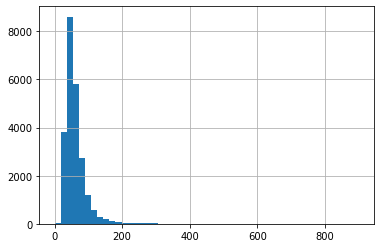

In [166]:
# исследуем, какие площади квартир продаются чаще
print(polluted_data['total_area'].describe())
print(polluted_data['total_area'].hist(bins=50,range =(0, 900)))

Больше всего на рынке представлены квартиры в промежутке от 40 кв.м до 70 кв.м. Пик предложения на 52 кв.м. Попробуем ещё проверить распределение на boxplot

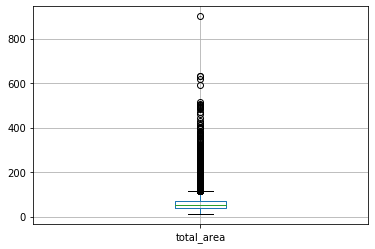

In [36]:
boxplot = polluted_data.boxplot(column=['total_area'])

Видно, что хотя основной разброс предложений действительно от 40 до 70 кв.м есть постоянный, длинный хвост квартир примерно до 400 кв. м. Далее отдельные предложения.

#### исследуем, сколько чаще всего стоит квартира, построим гистограмму

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


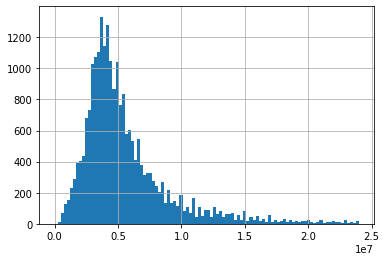

In [170]:
# исследуем, стоимости квартир на рынке
print(polluted_data['last_price'].describe())
print(polluted_data['last_price'].hist(bins=100, range =(0,24000000)))

In [ ]:
Большинство предложений приходится примерно на 4 миллиона рублей, распределение в целом нормальное. 
Попробуем ещё проверить распределение на boxplot

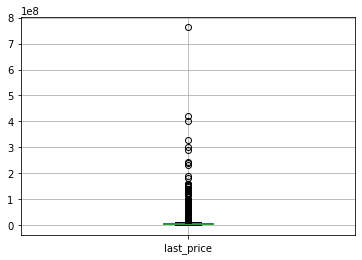

In [168]:
boxplot = polluted_data.boxplot(column=['last_price'])

Виден длинный хвост большой цены за большие квартиры. 

#### исследуем, сколько чаще всего комнат в предлагаемых квартирах, построим гистограмму

count    23699.000000
mean         2.069328
std          1.079409
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: clear_rooms, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


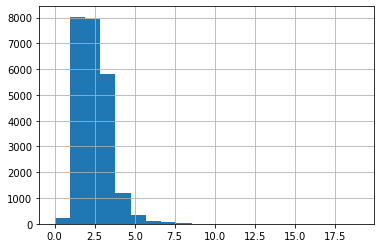

In [172]:
# исследуем, количество комнат в квартирах представленных на рынке
print(polluted_data['clear_rooms'].describe())
print(polluted_data['clear_rooms'].hist(bins=20))

Больше всего предложений на 1-2-х комнатные квартиры. Чуть меньше 3-х комнатных. Остальные предложения - экзотика связанная в основном со старым фондом в СПб.
Попробуем ещё проверить распределение на boxplot

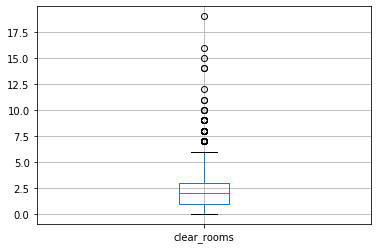

In [174]:
boxplot = polluted_data.boxplot(column=['clear_rooms'])

Подстверждается, что пик предложений на 2-х комнатных квартирах. И что настоящая экзотика начинается с 6-ти комнат :-)

#### исследуем, высоту потолков в предлагаемых квартирах, построим гистограмму

count    23699.000000
mean         2.699532
std          0.233568
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: clear_ceiling_height, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


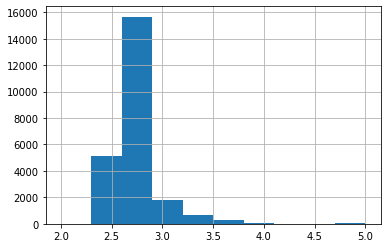

In [175]:
# исследуем, какие высоты потолков встречаются
print(polluted_data['clear_ceiling_height'].describe())
print(polluted_data['clear_ceiling_height'].hist(bins=10))

Основная часть предложения лежит вокруг 2,6 м. Это соответсвует нормам на эконом жильё. При этом присутсвует очень большой разброс, что характерно именно для СПб, где часто предлагаеются квартиры с очень высокими потолками.
Попробуем ещё проверить распределение на boxplot

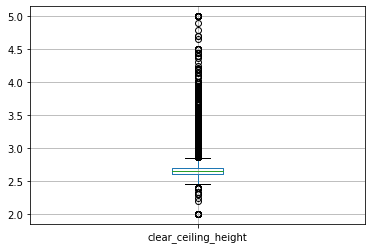

In [176]:
boxplot = polluted_data.boxplot(column=['clear_ceiling_height'])

Видны массовые выбросы в сторону высоких потолков


## Рассмотрим и изучим время продажи квартиры

Ответим на вопросы: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
Среднее количество дней до продажи: 180.88863436982163
Медианное количество дней до продажи: 95.0


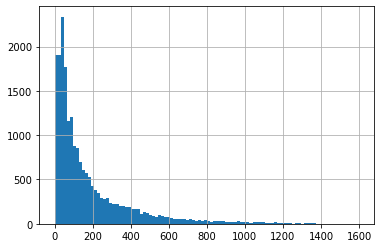

In [178]:
print(polluted_data['days_exposition'].describe())
print(polluted_data['days_exposition'].hist(bins=100,range =(0, 1600)))

В половине случаев, квартира продается примерно за три месяца. При этом есть вероятность, что квартира будет висеть в продажах пару лет и среднее время продажи получается уже в 6 месяцев.
Для определения очень быстрой и очень медленной продажи проверим распределение на boxplot

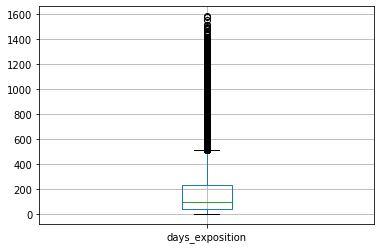

In [179]:
boxplot = polluted_data.boxplot(column=['days_exposition'])

В целом можно считать, что быстрая продажа, это продажа быстрее 45 дней, а медленной, продажу в пределах третьего квартиля - более 232 дней

## Обработаем и уберем редкие и выбивающиеся значения.
Возможно они указывают на ошибочные или мошеннические сделки. Для начала рассмотрим все имеющиеся у нас и подготовленные для анализа столбцы

In [180]:
# выделим сокращенную таблицу, которую мы будем использовать в дальнейшем исследовании

data = polluted_data[['total_images','last_price','total_area','first_day_exposition','floor',
       'is_apartment', 'studio', 'open_plan', 'balcony',
       'locality_name', 'airports_nearest','clear_cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'clear_rooms',
       'clear_ceiling_height', 'clear_floors_total', 'clear_kitchen_area',
       'clear_living_area', 'cost_per_square_meter', 'month_exposition',
       'year_exposition', 'weekday_name_exposition', 'first_and_last_floor',
       'useful_area_coefficient', 'kitchen_area_coefficient']]

#проверим столбцы
print(data.info())
# проверим значения 
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images                 23699 non-null int64
last_price                   23699 non-null int32
total_area                   23699 non-null float64
first_day_exposition         23699 non-null datetime64[ns]
floor                        23699 non-null int64
is_apartment                 2775 non-null object
studio                       23699 non-null bool
open_plan                    23699 non-null bool
balcony                      23699 non-null float64
locality_name                23699 non-null object
airports_nearest             18157 non-null float64
clear_cityCenters_nearest    23699 non-null int32
parks_around3000             18181 non-null float64
parks_nearest                8079 non-null float64
ponds_around3000             18181 non-null float64
ponds_nearest                9110 non-null float64
days_exposition              20518 non-null float64
clear_rooms        

,total_images,last_price,total_area,floor,balcony,airports_nearest,clear_cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,...,clear_rooms,clear_ceiling_height,clear_floors_total,clear_kitchen_area,clear_living_area,cost_per_square_meter,month_exposition,year_exposition,useful_area_coefficient,kitchen_area_coefficient
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,18157.000000,23699.000000,18181.000000,8079.000000,18181.000000,...,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,5.892358,0.591080,28793.672193,13936.676358,0.611408,490.804555,0.770255,...,2.069328,2.699532,10.659184,10.425362,35.972236,9.942121e+04,6.400101,2017.367146,0.584433,0.189147
std,5.682529,1.088701e+07,35.654083,4.885249,0.959298,12630.880622,7553.792559,0.802074,342.317995,0.938346,...,1.079409,0.233568,6.564315,5.630724,25.028915,5.030681e+04,3.491561,1.039771,0.123224,0.075024
min,0.000000,1.219000e+04,12.000000,1.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,...,0.000000,2.000000,1.000000,5.000000,2.000000,1.110000e+02,1.000000,2014.000000,0.020000,0.020000
25%,6.000000,3.400000e+06,40.000000,2.000000,0.000000,18585.000000,10927.000000,0.000000,288.000000,0.000000,...,1.000000,2.600000,5.000000,7.300000,19.000000,7.658500e+04,3.000000,2017.000000,0.500000,0.130000
50%,9.000000,4.650000e+06,52.000000,4.000000,0.000000,26726.000000,13098.000000,0.000000,455.000000,1.000000,...,2.000000,2.650000,9.000000,9.100000,30.800000,9.500000e+04,6.000000,2017.000000,0.580000,0.170000
75%,14.000000,6.800000e+06,69.900000,8.000000,1.000000,37273.000000,15248.500000,1.000000,612.000000,1.000000,...,3.000000,2.700000,16.000000,11.440000,43.300000,1.142560e+05,10.000000,2018.000000,0.660000,0.230000
max,50.000000,7.630000e+08,900.000000,33.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,...,19.000000,5.000000,35.000000,112.000000,571.000000,1.907500e+06,12.000000,2019.000000,1.000000,0.790000


#### Проверим редкие и выдающиеся значения:

total_images   -   количество фото в целом вполне невинная колонка и продавец может ставить сколько угодно фотографий для скорейшей продажи, медиана на примерно 10 фото это подтверждает. Здесь скорее отсутствие фото является чем то подозрительным. Думаю, в обработке я уберу те записи, в которых нет фотографий посчитав их подозрительными.

last_price - квартиры разные и их стоимость может очень сильно отличаться. Но минимум и максимум очень странны 

total_area - странно выглядит длинный хвост из-за огромных квартир, но так то в Санкт-Петербурге действительно можно встретить огромные квартиры. Тут странно выглядят квартиры с маленькой площадью, однако в СПб есть и такие - как часть выгороженных коммуналок. Я бы посчитал это подозрительными предложениями однако, так как юридически они считаются частью большой квартиры. Думаю, я уберу из сравнения все данные, менее 21 м2 (по СП 54.13330.2016 - рекомендуемая для однокомнатных не менее 28 м2, но я встречал согласованные совмещения части кухни и коридора, которые позволяли официально делать квартиры до 21 м2)

first_day_exposition  -  числа как числа :-) ничего особо удивительного 

floor - ничего уникального нет, всё нормально   

is_apartment - здесь либо апартаменты, либо нет. Оснований сказать, что что-то странное просто нет 

studio - здесь либо студия, либо нет. Оснований сказать, что что-то странное просто нет

open_plan - аналогично студиям или апартаментам :-) оставляю без изменения   

balcony - Тут полный перекос в сторону отсутсвия или одного балкона. Чисто теоретически могут быть конечно и пять балконов, но вот когда их больше 3-х это уже странно. Но это безобидная странность, думаю оставить данные в таблице

locality_name - тут тоже либо есть данные либо нет. Ничего особенно странного 

airports_nearest - тут странен минимум. Если посмотреть на карту СПб, то там ближе примерно 1800 метров от аэропорта жилья нет, стоит убрать все квартиры слишком близко к аэропорту

clear_cityCenters_nearest - это созданный мною столбец, думаю, если я уточню исходные для него данные - он будет нормален.

parks_around3000 - ничего особенного и заполнено автоматически

parks_nearest  - ничего особенного и заполнено автоматически

ponds_around3000 - ничего особенного и заполнено автоматически

ponds_nearest  - ничего особенного и заполнено автоматически

days_exposition  - Это странный столбец весь, учитывая, что иногда одна и та же квартира может сниматься с продажи и снова выставляться, а ещё продаваться по нескольку лет. Думаю, у меня нет оснований не верить этому столбцу.

clear_rooms - всякое бывает :-) и 19 комнат тоже

clear_ceiling_height - все данные непротиворечивы

clear_floors_total - все данные непротиворечивы   

clear_kitchen_area - все что больше 40 м2 странно, но возможно.

clear_living_area - всё что ниже 19 м2 странно. Предположим, что 14 м2 ещё как-то можно оправдать, всё что ниже почти невозможно оформить как квартиру. 

cost_per_square_meter - это созданный мною столбец, думаю, если я уточню исходные для него данные - он будет нормален.

month_exposition - это созданный мною столбец, думаю, если я уточню исходные для него данные - он будет нормален.

year_exposition - это созданный мною столбец, думаю, если я уточню исходные для него данные - он будет нормален.

weekday_name_exposition - это созданный мною столбец, думаю, если я уточню исходные для него данные - он будет нормален.

first_and_last_floor - это созданный мною столбец, думаю, если я уточню исходные для него данные - он будет нормален.

useful_area_coefficient - это созданный мною столбец, думаю, если я уточню исходные для него данные - он будет нормален. 

kitchen_area_coefficient - это созданный мною столбец, думаю, если я уточню исходные для него данные - он будет нормален.

#### Обработаем столбцы, которые вызывают подозрения

Обработаем столбец total_images удалим подозрительные объявления без фотографий 

In [181]:
# обрабатываю total_images
data['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

In [182]:
data = data.drop(data.query(
    'total_images ==0').index.tolist()).reset_index(drop=True)

# проверим результаты
data['total_images'].describe()

count    22640.000000
mean        10.319611
std          5.389126
min          1.000000
25%          6.000000
50%         10.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

Я удалил подозрительные объявления без фото. Их было не так и много

Рассмотрим столбец с ценами на квартиры. 

In [183]:
# обрабатываю last_price
data['last_price'].describe()

count    2.264000e+04
mean     6.598647e+06
std      1.108490e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Рассмотрим минимум и максимум

In [184]:
data[['last_price', 'total_area']].query('last_price < 500000')

,last_price,total_area
5450,450000,42.0
6561,490000,40.0
8394,12190,109.0
9151,450000,43.4
10286,490000,29.1
14240,430000,54.0
15316,480000,32.0
15493,450000,38.5
15545,440000,40.0
16673,430000,30.4


Похоже есть ошибочная запись с минимальной ценой, квартира явно не соответствует по площади с другими дешевыми квартирами. Думаю, поскольку непонятно, сколько может стоить эта квартира, минимальное значение необходимо удалить. Рассмотрим максимальные значения:

In [50]:
data[['last_price', 'total_area']].query('last_price > 200000000')

,last_price,total_area
1378,330000000,190.0
5637,230000000,500.0
12384,763000000,400.0
13127,240000000,410.0
14040,401300000,401.0
14948,300000000,618.0
15724,245000000,285.7
18666,420000000,900.0
21812,289238400,187.5


Данный столбец может быть сколь угодно большим, но разница между максимумом и чем-то ближайшим слишком большой. Я думаю, максимальное значение также ошибка. Поскольку мы не понимаем, какая может быть цена, его стоит просто удалить.

In [51]:
#удалим подозрительные значения
data = data.drop(data.query('last_price ==1.219000e+04').index.tolist()).reset_index(drop=True)
data = data.drop(data.query('last_price ==7.630000e+08').index.tolist()).reset_index(drop=True)

# проверим результаты
data['last_price'].describe()

count    2.263800e+04
mean     6.565525e+06
std      9.879688e+06
min      4.300000e+05
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      4.200000e+08
Name: last_price, dtype: float64

Рассмотрим столбцы с площадью, которая вызывает сомнения, заодно проверим, апартаменты ли это.

In [52]:
# обрабатываю total_area
data['total_area'].describe()

count    22638.000000
mean        60.538841
std         35.836216
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

Посмотрим внимательно значения меньше нормативных

In [53]:
#data['total_area'] = polluted_data['total_area'] 
#data['total_area'].describe()

In [54]:
data[['total_area', 'clear_living_area','clear_kitchen_area']].query('total_area < 21')

,total_area,clear_living_area,clear_kitchen_area
687,17.00,12.00,5.00
1541,20.10,11.00,9.10
3908,20.00,13.00,5.60
4356,18.00,9.00,9.10
5087,20.00,16.00,5.00
5601,19.50,12.70,5.00
5819,18.00,13.00,3.00
6259,20.30,16.00,4.00
7242,20.60,10.55,9.10
7411,20.67,14.95,14.95


Данные записи выглядят очень подозрительно. Все они похожи на характерные для СПб нарезанные кусочки бывших больших коммуналок. Проблема в том, что подобные нарезки практически никогда невозможно зарегистрировать как самостоятельные квартиры и они продаются как части общего имущества. Есть конечно вариант, что это бывшие дворницкие в центре СПб, но этот вариант маловероятен. Думаю, я удалю все подобные записи.

In [55]:
#удалим подозрительные значения
data = data.drop(data.query('total_area < 21').index.tolist()).reset_index(drop=True)
data['total_area'].describe()

count    22597.000000
mean        60.615850
std         35.822886
min         21.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

Проверим также максимумы площадей. Возможно там тоже что-то странное

In [56]:
data[['total_area', 'clear_living_area','clear_kitchen_area', 'last_price','clear_cityCenters_nearest','clear_ceiling_height','clear_rooms']].query('total_area > 500')

,total_area,clear_living_area,clear_kitchen_area,last_price,clear_cityCenters_nearest,clear_ceiling_height,clear_rooms
2979,631.0,571.0,60.0,140000000,4972,NaN,7
4057,517.0,332.0,22.0,50000000,1847,NaN,7
5126,590.0,409.0,100.0,65000000,4666,3.50,15
7647,507.0,301.5,45.5,84000000,5735,4.45,5
12250,631.2,322.3,19.5,140000000,4972,3.90,7
14920,618.0,258.0,70.0,300000000,5297,3.40,7
18632,900.0,409.7,112.0,420000000,7877,2.80,12


Подобные квартиры выглядят странно. Но они находятся в центре СПб и в общем реальны.  

Обработаем столбец близости к аэропорту. В СПб нет жилых зданий ближе 1800 м от аэропорта

In [185]:
data['airports_nearest'].describe()

count    17349.000000
mean     28815.234941
std      12584.096865
min       6450.000000
25%      18641.000000
50%      26771.000000
75%      37284.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Похоже все подозрительные значения удалились при более ранней обработке базы

Проверим жилую площадь, столбец clear_living_area, всё что ниже 14 м2 почти невероятно оформить как квартиру. Скорее всего это части большой квартиры. Удалим все подозрительные данные.

In [186]:
data['clear_living_area'].describe()

count    22640.000000
mean        36.018009
std         25.152176
min          2.000000
25%         19.000000
50%         30.800000
75%         43.300000
max        571.000000
Name: clear_living_area, dtype: float64

In [187]:
data = data.drop(data.query('clear_living_area < 14').index.tolist()).reset_index(drop=True)
data['clear_living_area'].describe()

count    22306.000000
mean        36.382030
std         25.160737
min         14.000000
25%         19.500000
50%         31.000000
75%         43.500000
max        571.000000
Name: clear_living_area, dtype: float64

Попробуем снова посмотреть отредактированную таблицу

In [60]:
#проверим столбцы
print(data.info())
# проверим характериные значения
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22286 entries, 0 to 22285
Data columns (total 29 columns):
total_images                 22286 non-null int64
last_price                   22286 non-null int32
total_area                   22286 non-null float64
first_day_exposition         22286 non-null datetime64[ns]
floor                        22286 non-null int64
is_apartment                 2658 non-null object
studio                       22286 non-null bool
open_plan                    22286 non-null bool
balcony                      22286 non-null float64
locality_name                22239 non-null object
airports_nearest             17099 non-null float64
clear_cityCenters_nearest    22286 non-null int32
parks_around3000             17121 non-null float64
parks_nearest                7646 non-null float64
ponds_around3000             17121 non-null float64
ponds_nearest                8583 non-null float64
days_exposition              19194 non-null float64
clear_rooms        

,total_images,last_price,total_area,floor,balcony,airports_nearest,clear_cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,...,clear_rooms,clear_ceiling_height,clear_floors_total,clear_kitchen_area,clear_living_area,cost_per_square_meter,month_exposition,year_exposition,useful_area_coefficient,kitchen_area_coefficient
count,22286.000000,2.228600e+04,22286.000000,22286.00000,22286.000000,17099.000000,22286.000000,17121.000000,7646.000000,17121.00000,...,22286.000000,13798.000000,22286.000000,22286.000000,22286.000000,2.228600e+04,22286.000000,22286.000000,22286.000000,22286.000000
mean,10.344611,6.609929e+06,60.954928,5.90402,0.594185,28788.522077,13855.225927,0.615443,491.147659,0.77221,...,2.088037,2.731607,10.671991,10.424064,36.389889,9.957953e+04,6.388764,2017.376873,0.586137,0.186063
std,5.393276,9.940295e+06,35.933370,4.88757,0.963871,12554.060980,7460.711877,0.804415,342.973201,0.94026,...,1.080956,0.292120,6.565834,5.697704,25.124008,4.933142e+04,3.489358,1.039357,0.119869,0.071060
min,1.000000,4.300000e+05,21.000000,1.00000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.00000,...,0.000000,2.000000,1.000000,1.300000,14.000000,7.962000e+03,1.000000,2014.000000,0.160000,0.020000
25%,6.000000,3.480000e+06,40.500000,2.00000,0.000000,18626.000000,10885.000000,0.000000,288.000000,0.00000,...,1.000000,2.520000,5.000000,7.200000,19.500000,7.669675e+04,3.000000,2017.000000,0.500000,0.130000
50%,10.000000,4.700000e+06,52.600000,4.00000,0.000000,26766.000000,13098.000000,0.000000,455.000000,1.00000,...,2.000000,2.650000,9.000000,9.100000,31.000000,9.516100e+04,6.000000,2017.000000,0.580000,0.170000
75%,14.000000,6.857500e+06,70.000000,8.00000,1.000000,37243.000000,15194.250000,1.000000,612.000000,1.00000,...,3.000000,2.800000,16.000000,11.500000,43.500000,1.144252e+05,10.000000,2018.000000,0.660000,0.230000
max,50.000000,4.200000e+08,900.000000,33.00000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.00000,...,19.000000,5.000000,35.000000,112.000000,571.000000,1.736842e+06,12.000000,2019.000000,1.000000,0.790000


В целом данные стали ровнее. Выбросов стало меньше.

### Ответим на вопрос исследования: "Какие факторы больше всего влияют на стоимость квартиры? 
зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра.

In [188]:
#сделаем сводную таблицу и матрицу рассеяния
important_price_factor_1 = data[['last_price', 'total_area', 'clear_rooms','first_and_last_floor','clear_cityCenters_nearest']]
important_price_factor_1.describe()

,last_price,total_area,clear_rooms,clear_cityCenters_nearest
count,2.230600e+04,22306.000000,22306.000000,22306.000000
mean,6.639829e+06,60.938933,2.087017,13853.757061
std,1.115299e+07,36.009514,1.081940,7459.347617
min,1.219000e+04,17.780000,0.000000,181.000000
25%,3.480000e+06,40.400000,1.000000,10885.000000
50%,4.700000e+06,52.600000,2.000000,13098.000000
75%,6.850000e+06,70.000000,3.000000,15189.750000
max,7.630000e+08,900.000000,19.000000,65968.000000


Не получается вывести столбец first_and_last_floor. Приведем его к числовому виду, для обработки. Установим первый этаж как 1, не первый и не последний как 2 и последний как 3

In [189]:
#Преобразуем столбец
print(data['first_and_last_floor'].value_counts(dropna=False,ascending=False))
important_price_factor_1['first_and_last_floor'] = important_price_factor_1['first_and_last_floor'].replace('первый', 1)
important_price_factor_1['first_and_last_floor'] = important_price_factor_1['first_and_last_floor'].replace('другой', 2)
important_price_factor_1['first_and_last_floor'] = important_price_factor_1['first_and_last_floor'].replace('последний', 3)
print(important_price_factor_1['first_and_last_floor'].value_counts(dropna=False,ascending=False))

другой       16466
последний     3152
первый        2688
Name: first_and_last_floor, dtype: int64
2    16466
3     3152
1     2688
Name: first_and_last_floor, dtype: int64


C:\Users\Igor\anaconda3\envs\praktikum\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Igor\anaconda3\envs\praktikum\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Igor\anaconda3\envs\praktikum\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a 

Построим и изучим матрицу рассеяния и матрицу корреляции

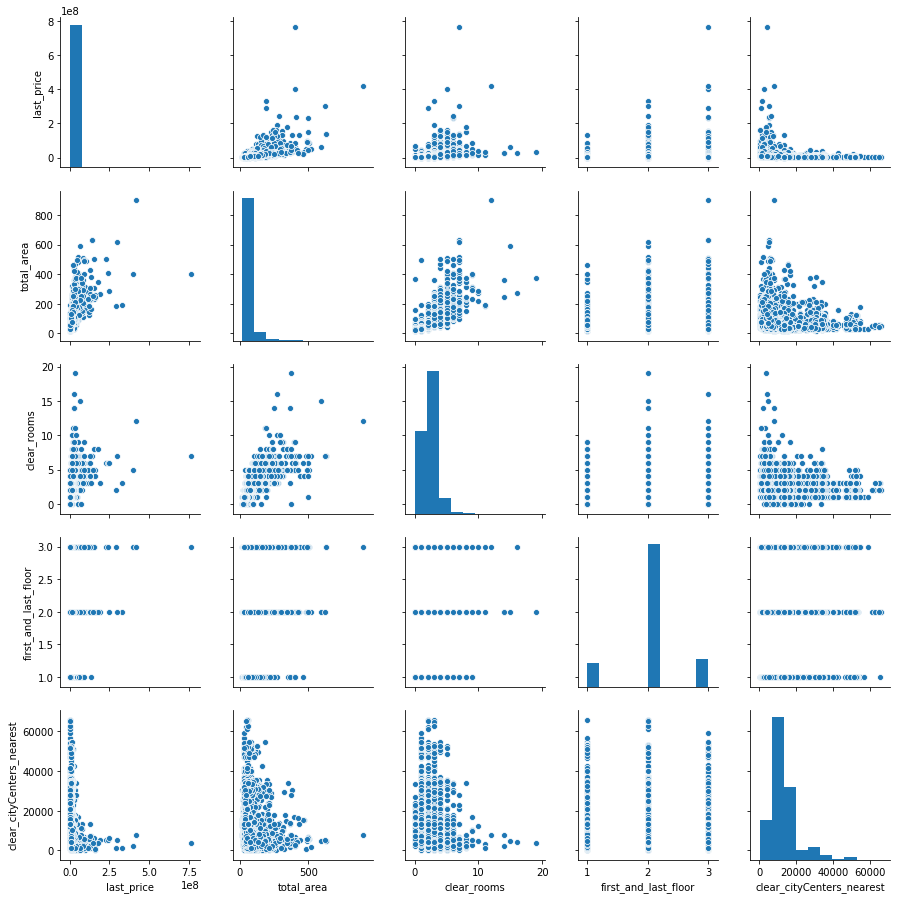

In [190]:
sns.pairplot(important_price_factor_1)

In [191]:
print(important_price_factor_1.corr())

                           last_price  total_area  clear_rooms  \
last_price                   1.000000    0.653989     0.361918   
total_area                   0.653989    1.000000     0.755959   
clear_rooms                  0.361918    0.755959     1.000000   
first_and_last_floor         0.057717    0.065701     0.028094   
clear_cityCenters_nearest   -0.192408   -0.214066    -0.165788   

                           first_and_last_floor  clear_cityCenters_nearest  
last_price                             0.057717                  -0.192408  
total_area                             0.065701                  -0.214066  
clear_rooms                            0.028094                  -0.165788  
first_and_last_floor                   1.000000                  -0.022083  
clear_cityCenters_nearest             -0.022083                   1.000000  


Итак, стоимость квартиры очень сильно зависит от её размера, это логично, так как во многом связано со стоимостью квадратного метра, чем больше площадь квартиры, тем больше цена на неё. Так-же очевидно, что количество комнат зависит от площади квартиры :-), чем больше площадь, тем больше комнат. Очевидно, что квартиры находящиеся более чем в 10 км от центра резко падают в цене. Также квартиры на первом этаже дешевле, чем другие, а самые дорогие те, которые расположены не на первом и не на последнем этаже. При этом есть сверхдорогие выбросы квартир на последнем этаже. Судя по всему это многоэтажные пентхаусы. 

### Давайте рассмотрим зависимость стоимости продажи от даты размещения: дня недели, месяца и года. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001242C9614C8>,
      dtype=object)

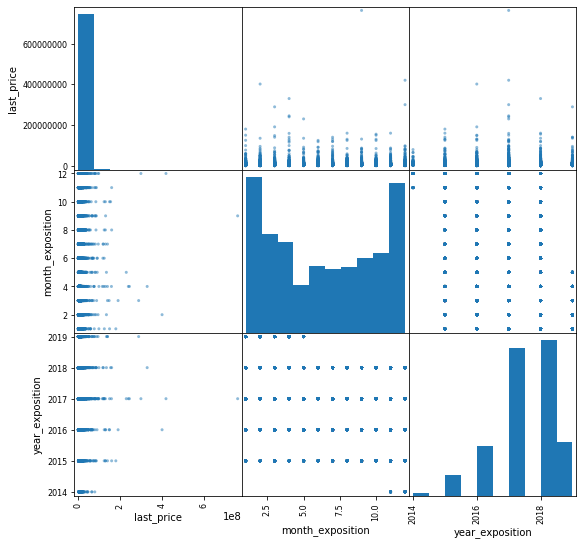

In [192]:
important_price_factor_2 = data[['last_price', 'weekday_name_exposition','month_exposition', 'year_exposition']]
pd.plotting.scatter_matrix(important_price_factor_2, figsize=(9, 9)) 

In [193]:
print(important_price_factor_2.corr())

                  last_price  month_exposition  year_exposition
last_price          1.000000          0.002264        -0.043649
month_exposition    0.002264          1.000000        -0.268969
year_exposition    -0.043649         -0.268969         1.000000


Цена продажи никак не связана с временем размещения объявления

### Ответим на вопрос: "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья"

In [194]:
# сгруппируем и отсортируем населенные пункты по количеству объявлений, выберем десять населенных пунктов 
# с максимальным количеством объявлений

local_price = (data.pivot_table(index='locality_name', values='cost_per_square_meter', aggfunc='count')
    .sort_values(by='cost_per_square_meter', ascending=False).head(10).reset_index())
print(local_price)

       locality_name  cost_per_square_meter
0    Санкт-Петербург                  14929
1     посёлок Мурино                    487
2     посёлок Шушары                    405
3         Всеволожск                    378
4             Пушкин                    344
5  посёлок Парголово                    296
6            Колпино                    295
7            Гатчина                    295
8    деревня Кудрово                    275
9             Выборг                    228


In [195]:
#Посчитаем среднюю стоимость квадратного метра в этих населенных пунктах
local_10_name = []
local_10_square = []

for i in local_price['locality_name']:
    local_10_name.append(i)
    local_10_square.append(data[data['locality_name'] == i]['cost_per_square_meter'].mean().astype('int'))

local_square_tab = pd.DataFrame({'locality_name': local_10_name,'cost_per_square_meter': local_10_square})

local_square_tab.sort_values(by='cost_per_square_meter',ascending=False)

,locality_name,cost_per_square_meter
0,Санкт-Петербург,114953
4,Пушкин,103790
8,деревня Кудрово,92405
5,посёлок Парголово,89322
1,посёлок Мурино,85546
2,посёлок Шушары,78356
6,Колпино,75593
3,Всеволожск,68810
7,Гатчина,68687
9,Выборг,57942


Из всех населенных пунктов, самую большую цену квадратного метра имеет Санкт-Петербург. Интересно, что цена квадратного метра квартиры в Пушкине, который находится относительно далеко от СПб, превышает цены в фактически являющимися пригородами СПб Кудрово, Мурино и Шушарах. Минимальная цена за квадратный метр в Выборге. Возможно это связано с удаленностью Выборга от СПб.

### Определение и изучение квартир в центре Санкт-Петербурга

Выясним, какая область входит в центр (предполагаю, что те 10 км, которые очень влияют на цену квадратного метра). Для ответа на вопрос создадим столбец с расстоянием до центра в километрах и посчитаем среднюю цену для каждого километра. Построим график и определим границу, где график сильно меняется — это и будет центральная зона.

    km_from_center  cost_per_square_meter
0                0          191191.234568
1                1          168424.172566
2                6          152901.466814
3                2          148324.600683
4                5          146072.347411
5                7          142326.525510
6                4          137345.936709
7               27          132115.000000
8                3          128933.007874
9                8          120120.748823
10              10          111918.119678
11               9          109839.699695
12              13          108997.580014
13              12          108398.999310
14              20          107423.573171
15              11          106758.736684
16              14          105076.371964
17              15          101884.615981
18              16          100211.366412
19              18           95673.681529
20              17           93846.774131
21              19           93267.080000
22              23           91447

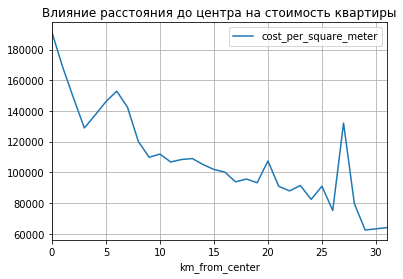

In [196]:
# округлим расстояние до километров

data['km_from_center'] = data['clear_cityCenters_nearest'] / 1000
data['km_from_center'] = data['km_from_center'].astype('int')

# отберем значения для построения графика
in_spb = data.query('locality_name == "Санкт-Петербург"')

cityCenter_price_per_km = (
    in_spb.pivot_table(index='km_from_center', values='cost_per_square_meter', aggfunc='mean')
    .sort_values(by='cost_per_square_meter', ascending=False).reset_index())

# проверим что получилось
print(cityCenter_price_per_km)

# и построим график
cityCenter_price_per_km.sort_values('km_from_center').plot(
    x='km_from_center', y='cost_per_square_meter', grid=True,
    title='Влияние расстояния до центра на стоимость квартиры') 

На графике видно три пика стоимости. Первый, это сам центр, примерно радусом 3,5 км. Второй пик - около 7 км от центра, это реконструируемый "серый пояс", когда бывшие фабрики переделываются под высококачественное жильё. И третий пик - около 30 км, это скорее всего высококачественное жильё практически за городом, скорее всего в Курортном районе Санкт-Петербурга. Границей центра СПб, я обозначу расстояние в 3,5 км.

### Изучим квартиры в центре Санкт-Петербурга
Рассмотрим характерные особенности: площадь, цену, число комнат и высоту потолков. 
Проанализируем от чего зависит цена квартиры

In [197]:
#выделим выборку по центру
spb_center = data.query('locality_name == "Санкт-Петербург" and km_from_center < 3.5')
spb_center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 22 to 22259
Data columns (total 30 columns):
total_images                 1108 non-null int64
last_price                   1108 non-null int32
total_area                   1108 non-null float64
first_day_exposition         1108 non-null datetime64[ns]
floor                        1108 non-null int64
is_apartment                 143 non-null object
studio                       1108 non-null bool
open_plan                    1108 non-null bool
balcony                      1108 non-null float64
locality_name                1108 non-null object
airports_nearest             1108 non-null float64
clear_cityCenters_nearest    1108 non-null int32
parks_around3000             1108 non-null float64
parks_nearest                795 non-null float64
ponds_around3000             1108 non-null float64
ponds_nearest                953 non-null float64
days_exposition              898 non-null float64
clear_rooms                  1108 non

В центре СПб предлагается чуть более тысячи квартир. 

#### Какова обычная площадь подобных предложений?

count    1108.000000
mean       98.685397
std        56.071620
min        21.000000
25%        63.225000
50%        85.100000
75%       116.700000
max       517.000000
Name: total_area, dtype: float64

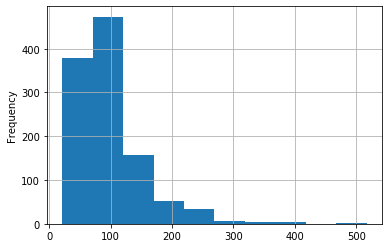

In [203]:
spb_center['total_area'].plot.hist(bins=10, grid=True)
spb_center['total_area'].describe()

Площадь квартир предлагаемых в центре СПб значительно больше квартир предлагаемых за пределами центра. Похоже почти все выбросы по площади квартир сосредоточены здесь. Половина квартир предлагаемых в центре имеет площадь около 100 кв. м. Это примерно в два раза больше медианной площади предлагаемых всего квартир. 

#### Рассмотрим ценовые предложения
Для удобства переведем цены в миллионы рублей

count    1108.000000
mean       16.358796
std        33.596201
min         2.176000
25%         7.200000
50%         9.675000
75%        14.550000
max       763.000000
Name: last_price, dtype: float64

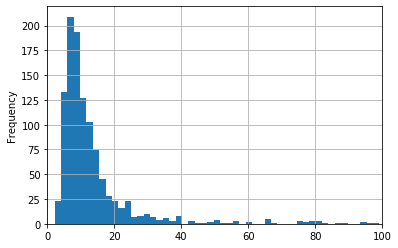

In [205]:
price_for_spb_center = spb_center['last_price'] / 1000000
price_for_spb_center.plot.hist(bins=400, xlim=(0, 100), grid=True)
price_for_spb_center.describe()

Половина квартир в центре стоит чуть больше 9,5 млн. рублей. При этом сдвиг в большую сторону средней цены в центре вызвана небольшим количеством крайне дорогих и больших квартир.

#### Рассмотрим какое количество комнат в квартирах центра СПб

count    1108.000000
mean        3.132671
std         1.566213
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        19.000000
Name: clear_rooms, dtype: float64

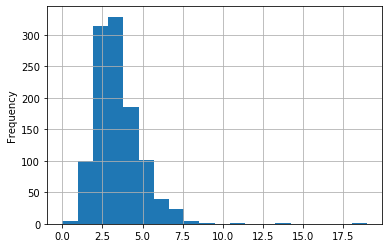

In [208]:
spb_center['clear_rooms'].plot.hist(bins=20, grid=True)
spb_center['clear_rooms'].describe()

Очевидно, что в квартирах расположенных в центре СПб большее количество комнат чем в среднем по городу. Это связано и с большей площадью квартир и с тем, что в "старом фонде" возможно не соблюдать современные нормы по площадям комнат 

#### Рассмотрим высоту потолков в квартирах предлагаемых в центре

count    1108.000000
mean        3.033899
std         0.403532
min         2.450000
25%         2.650000
50%         3.000000
75%         3.300000
max         5.000000
Name: clear_ceiling_height, dtype: float64

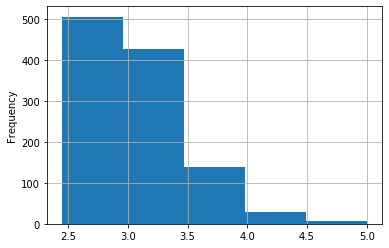

In [210]:
spb_center['clear_ceiling_height'].plot.hist(bins=5, grid=True)
spb_center['clear_ceiling_height'].describe()

Потолки в центре СПб в среднем выше, чем вне центра. Обычная их высота 3 м с большим количеством более высоких вариантов. Это вполне соответсвует реальности. В целом, несмотря на то, что я ограничил высоту потолков 5 м, я сам видел однокомнатную квартиру площадью окло 100 м2 с высотой потолков в 8 м.

#### Исследуем факторы, которые могут иметь влияние на стоимость квартиры для центра СПб
Проверим как число комнат, этаж, удалённость от центра, дата размещения объявления влияют на цену
Создадим нужную нам выборку, сделаем матрицу корреляции и матрицу распределения

C:\Users\Igor\anaconda3\envs\praktikum\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Igor\anaconda3\envs\praktikum\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Igor\anaconda3\envs\praktikum\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012431C20048>,
      dtype=object)

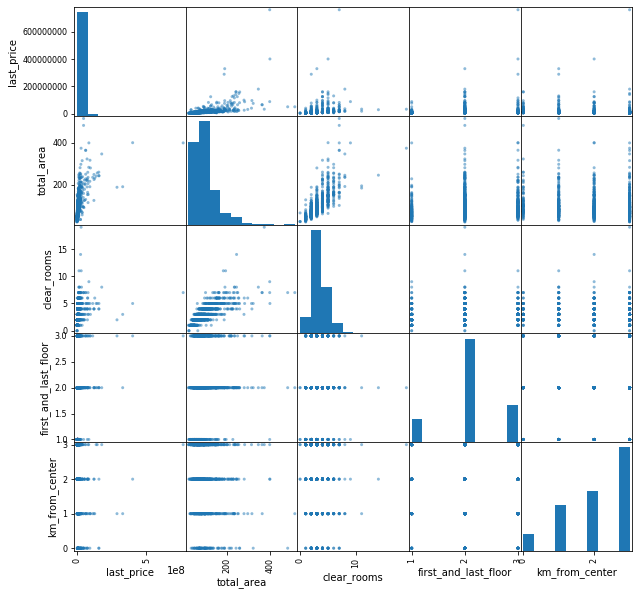

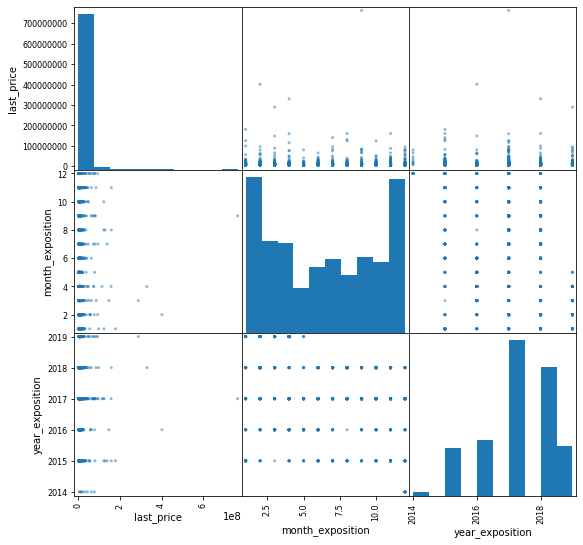

In [219]:

important_center_price_factor = spb_center[['last_price', 'total_area', 'clear_rooms','first_and_last_floor','km_from_center']]

# снова подготовим столбец first_and_last_floor к сравнению
important_center_price_factor['first_and_last_floor'] = important_center_price_factor['first_and_last_floor'].replace('первый', 1)
important_center_price_factor['first_and_last_floor'] = important_center_price_factor['first_and_last_floor'].replace('другой', 2)
important_center_price_factor['first_and_last_floor'] = important_center_price_factor['first_and_last_floor'].replace('последний', 3)

pd.plotting.scatter_matrix(important_center_price_factor, figsize=(10, 10)) 


important_center_price_factor_time = spb_center[['last_price', 'weekday_name_exposition','month_exposition', 'year_exposition']]

pd.plotting.scatter_matrix(important_center_price_factor_time, figsize=(9, 9)) 

In [218]:
print(important_center_price_factor.corr())

                      last_price  total_area  clear_rooms  \
last_price              1.000000    0.532471     0.241160   
total_area              0.532471    1.000000     0.751934   
clear_rooms             0.241160    0.751934     1.000000   
first_and_last_floor    0.085596    0.118298     0.105591   
km_from_center         -0.096472   -0.126306    -0.064659   

                      first_and_last_floor  km_from_center  
last_price                        0.085596       -0.096472  
total_area                        0.118298       -0.126306  
clear_rooms                       0.105591       -0.064659  
first_and_last_floor              1.000000       -0.007873  
km_from_center                   -0.007873        1.000000  


В целом зависимости стоимости квартиры для центра такие же как и везде - чем больше площадь, тем больше цена. Первый этаж всегда уменьшает стоимость квартиры. Стоимость квартир в среднем каждый год растет. Заметный скачек цен был в 2017 году

## Общий вывод

Больше всего на стоимость квартиры влияет площадь квартиры и близость квартиры к центру. Сами квартиры в СПб очень разнообразны. Квартиры в центре как правило больше и имеют более высокие потолки. Интересно, что кроме резкого пика по стоимости квартир в центре, но стоимостям выделяются квартиры в реновируемых районах "серого пояса" и квартиры на удалении примерно 30 км от центра СПб, предположительно расположенные в Курортном районе. 
Квартиры в СПб дороже квартир в Ленинградской области.